# Random potential

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [73]:
Np=256

In [74]:
Vi=np.random.uniform(0,1,Np)

k=np.fft.rfftfreq(Np)
kc=.0125
kc=np.random.uniform(1,10)*k[1]
V0=3
M=4
Vk=V0*np.fft.rfft(Vi)
Vx=np.fft.irfft(np.exp(-(k/kc)**M)*Vk)
print(kc,k[1],k[2])

0.0152633341739 0.00390625 0.0078125


In [75]:
beta=0.5
x = np.arange(-10, 10, 20/256)
x1=Np//5
f1=0.5*(1-np.tanh(beta*(x-x1)))
x2=x[-1]-x1
f2=0.5*(1+np.tanh(beta*(x-x2)))
f12=1-f1-f2

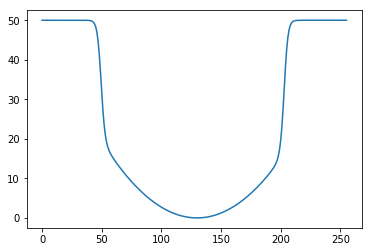

In [79]:
#plt.plot(Vi)
#plt.plot(Vx)
#plt.plot(f1)
#plt.plot(f2)
#plt.plot(f12)
#Vmax=2
#plt.plot(Vx*f12)
#os.chdir("../../data/nonlinearSE/generic_dataset/" + "harmonic/")
Vx = np.loadtxt("potential-generic.dat")
a = Vx[0]
plt.plot(a)
Vx = a

In [80]:
def ptl_num(mu,Vx,gg):
    return np.clip((mu-Vx)/gg, a_min=0, a_max=None)

def fmu(mu):
    from scipy.integrate import trapz
    gg=1
    dx=0.1
    return trapz(ptl_num(mu,Vx,gg))*dx-1
    #return mu**2-mu

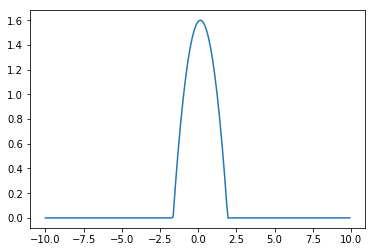

In [82]:
n_tf=ptl_num(1.6,Vx,1.)

plt.plot(x, n_tf)

In [83]:
from scipy.optimize import newton

print(fmu(1.6))

mu=newton(fmu,1.6)

print(mu)

print(fmu(mu))

3.88386218695
0.555691107261
-1.11022302463e-16


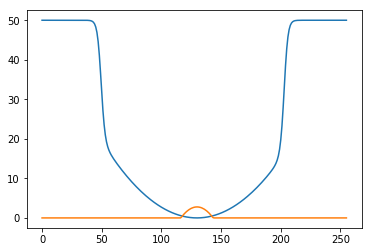

In [84]:
plt.plot(Vx)
plt.plot(5*ptl_num(mu,Vx,1.))